In [1]:
import pandas as pd
import numpy as np


### About `annual_return = (1 + df['Cumulative_Return'].iloc[-1]) ** (252 / len(df)) - 1`

1. `df['Cumulative_Return'].iloc[-1]`: This selects the last value in the 'Cumulative_Return' column, which represents the total return over the entire period.

2. `(1 + df['Cumulative_Return'].iloc[-1])`: We add 1 to the cumulative return to get the total growth factor.

3. `** (252 / len(df))`: This is the key part for annualization. Here's what's happening:
   - 252 represents the typical Australian number of trading days in a year.
   - `len(df)` is the number of days in our dataset.
   - The ratio `252 / len(df)` converts our period to an annual basis.
   - Raising the total growth factor to this power annualizes the return.

4. `- 1`: We subtract 1 at the end to convert from a growth factor back to a return.

The formula is essentially:
annual_return = (1 + total_return)^(years) - 1

Where 'years' is calculated as (252 / number of days in the dataset).

This calculation assumes compound growth and adjusts for the actual number of days in the dataset to provide an annualized return rate. It's a standard method for comparing returns over different time periods on an annual basis.

For example, if your cumulative return over 126 days (half a year) was 10%:
annual_return = (1 + 0.10)^(252/126) - 1 = 0.21 or 21%

This shows that a 10% return over half a year is equivalent to a 21% annual return, assuming the same growth rate continues.

[DEBUG] original df.tail()             Daily_Return
Date                    
2023-12-27      0.005693
2023-12-28      0.015827
2023-12-29     -0.000588
2023-12-30      0.004517
2023-12-31      0.007401
[DEBUG] df.tail() after cumprod             Daily_Return  Cumulative_Return
Date                                       
2023-12-27      0.005693           0.191743
2023-12-28      0.015827           0.210605
2023-12-29     -0.000588           0.209894
2023-12-30      0.004517           0.215359
2023-12-31      0.007401           0.224355
[DEBUG] df['Cumulative_Return'].iloc[-1]:  0.22435474713779868 [DEBUG] 252/len(df):  0.6904109589041096
Annualized Return: 15.00%
Annualized Volatility: 15.05%
Sharpe Ratio: 0.8637


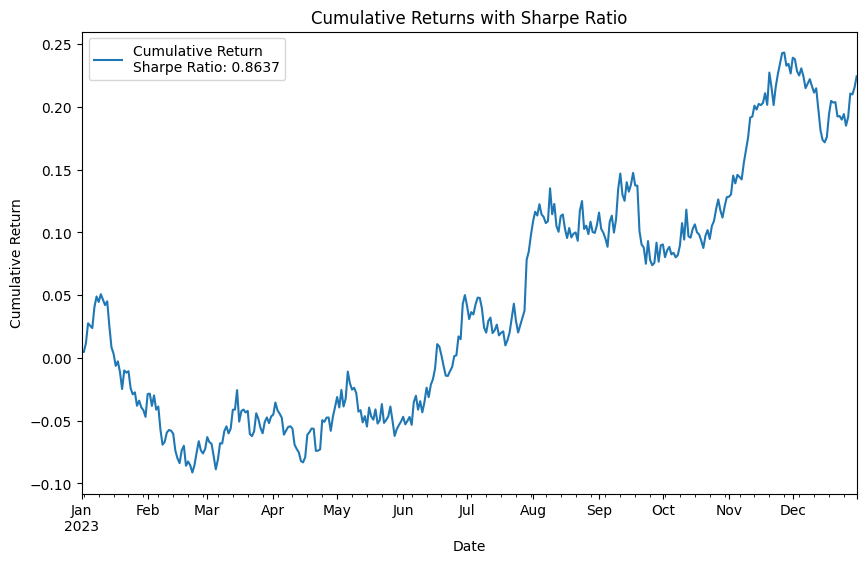

In [5]:
# Create sample data
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
np.random.seed(42)  # for reproducibility
returns = np.random.normal(0.0005, 0.01, len(dates))  # Daily returns

# Create a DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Daily_Return': returns
})

# Set Date as index
df.set_index('Date', inplace=True)
print("[DEBUG] original df.tail()",df.tail())

# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
print("[DEBUG] df.tail() after cumprod",df.tail())

# Calculate annualised return
annual_return = (1 + df['Cumulative_Return'].iloc[-1]) ** (252 / len(df)) - 1
print("[DEBUG] df['Cumulative_Return'].iloc[-1]: ", df['Cumulative_Return'].iloc[-1], "[DEBUG] 252/len(df): ",252/len(df))

# Calculate annualised volatility (standard deviation)
annual_volatility = df['Daily_Return'].std() * np.sqrt(252)

# Set risk-free rate (assuming 2% annual rate)
# Research on how this value is chosen, eg. it's based of treasury bills
risk_free_rate = 0.02

# Calculate Sharpe Ratio
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

# Print results
print(f"Annualized Return: {annual_return:.2%}")
print(f"Annualized Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Plot cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Cumulative_Return'].plot(label=f'Cumulative Return\nSharpe Ratio: {sharpe_ratio:.4f}')
plt.title('Cumulative Returns with Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()